<a href="https://colab.research.google.com/github/Imran1hp/Food-Recognition-Deep-Learning-model/blob/main/Food_recognition_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
from pathlib import Path
import torch


#making the data folder
folder_name = 'pizza_stack_shushi'

data_path = Path("data/")
image_path = data_path / folder_name

if image_path.is_dir():
  print("File already exist skipping download......")

else:
  print(f'{image_path} downloading ......... ')
  image_path.mkdir(parents = True , exist_ok = True )


  #Downloading Data
  with open(data_path / "pizza_stack_shushi.zip" , 'wb') as f:
    url = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/data/pizza_steak_sushi.zip')
    print("Downloading the data............." )
    f.write(url.content)

  #Unzip t he file
  with zipfile.ZipFile( data_path / "pizza_stack_shushi.zip" , 'r' ) as zip_ref:
    print('Unziping the data ')
    zip_ref.extractall(image_path)




data/pizza_stack_shushi downloading ......... 
Unziping the data 


In [2]:
import os



def walk_through_data(dir_path):
  for dirpath , dirnames , filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [3]:
image_path

PosixPath('data/pizza_stack_shushi')

In [4]:
walk_through_data(image_path)

There are 2 directories and 0 images in data/pizza_stack_shushi 
There are 3 directories and 0 images in data/pizza_stack_shushi/train 
There are 0 directories and 75 images in data/pizza_stack_shushi/train/steak 
There are 0 directories and 72 images in data/pizza_stack_shushi/train/sushi 
There are 0 directories and 78 images in data/pizza_stack_shushi/train/pizza 
There are 3 directories and 0 images in data/pizza_stack_shushi/test 
There are 0 directories and 19 images in data/pizza_stack_shushi/test/steak 
There are 0 directories and 31 images in data/pizza_stack_shushi/test/sushi 
There are 0 directories and 25 images in data/pizza_stack_shushi/test/pizza 


In [5]:

train_dir = image_path/ 'train'
test_dir =  image_path / 'test'
train_dir , test_dir


(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

Image path data/pizza_stack_shushi/test/pizza/2508636.jpg
Image Class: pizza
Image Height: 512
Image Width: 512


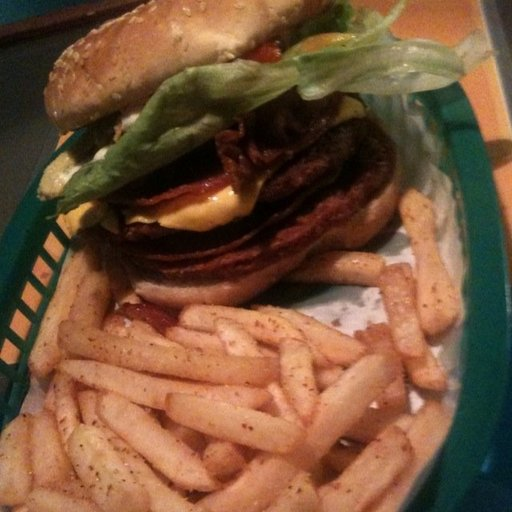

In [6]:
import random
from PIL import Image




img_path_list = list(image_path.glob('*/*/*.jpg'))

random_img_path = random.choice(img_path_list)

img_class = random_img_path.parent.stem

img = Image.open(random_img_path)
print(f"Image path {random_img_path}")
print(f"Image Class: {img_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")

img


In [7]:
img_path_list

[PosixPath('data/pizza_stack_shushi/train/steak/1598345.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2603058.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2129685.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/937133.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/443210.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/735441.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1839481.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/214320.jpg'),
 PosixPath('data/pizza_stack_shushi/train/steak/922752.jpg'),


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

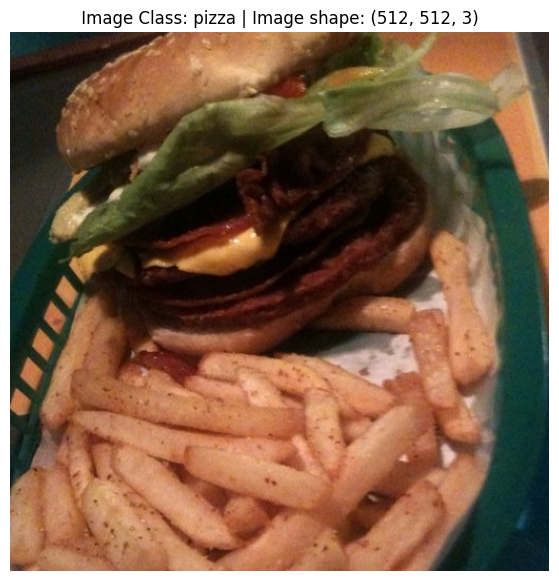

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_array = np.array(img)

plt.figure(figsize = ((10 ,7)))

plt.imshow(img_array)

plt.title(f" Image Class: {img_class} | Image shape: {img_array.shape} ")
plt.axis(False)

array([[[ 23,  52,  66],
        [ 21,  50,  64],
        [ 26,  55,  69],
        ...,
        [ 49,  41,  30],
        [ 54,  44,  34],
        [ 51,  41,  31]],

       [[ 29,  58,  72],
        [ 25,  54,  68],
        [ 29,  58,  72],
        ...,
        [ 51,  43,  32],
        [ 55,  45,  35],
        [ 50,  40,  30]],

       [[ 23,  53,  64],
        [ 20,  50,  61],
        [ 26,  56,  67],
        ...,
        [ 51,  42,  33],
        [ 53,  43,  34],
        [ 48,  38,  29]],

       ...,

       [[121,  90,  70],
        [116,  85,  65],
        [106,  77,  59],
        ...,
        [ 14,  37,  43],
        [ 11,  34,  40],
        [ 13,  36,  42]],

       [[129,  97,  76],
        [119,  88,  68],
        [111,  82,  64],
        ...,
        [ 12,  36,  40],
        [  7,  31,  35],
        [  8,  32,  36]],

       [[139, 107,  86],
        [126,  95,  74],
        [119,  88,  70],
        ...,
        [ 11,  35,  39],
        [  6,  30,  34],
        [  6,  30,  34]]], dtype=uint8)
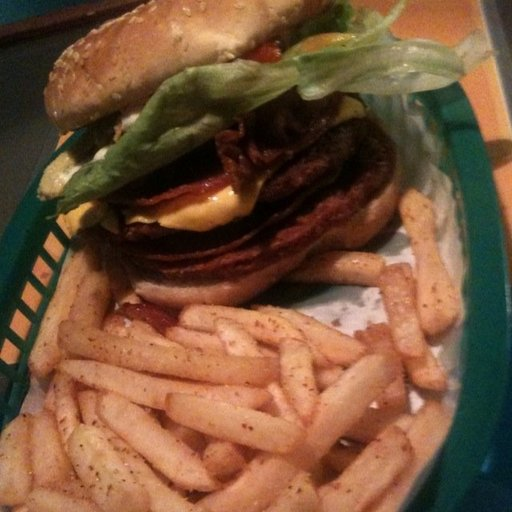

In [9]:
img_array

FOR UNDERSTANDING THE PIEXL DISTRIBUTION  OF 5 x 5

In [10]:
img_2_array = np.array([
 [(255, 0, 0),   (255, 0, 0),   (0, 0, 0),     (0, 0, 0),     (0, 0, 0)],
 [(255, 0, 0),   (255, 0, 0),   (0, 255, 0),   (0, 255, 0),   (0, 0, 0)],
 [(0, 0, 0),     (0, 255, 0),   (0, 0, 255),   (0, 255, 0),   (0, 0, 0)],
 [(0, 0, 0),     (0, 255, 0),   (0, 255, 0),   (255, 0, 0),   (255, 0, 0)],
])

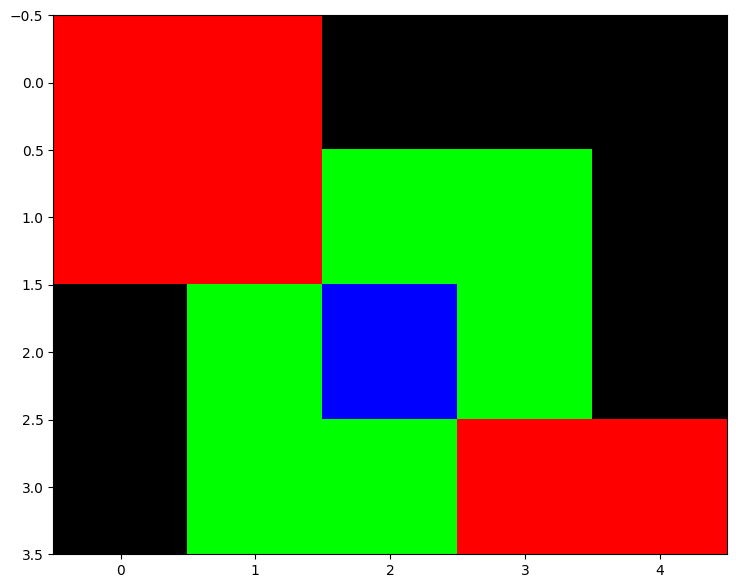

In [11]:
plt.figure (figsize =(10,7))

plt.imshow(img_2_array)

In [12]:
img_2_array.shape # --> heigth , width , color channel

(4, 5, 3)

In [13]:
print(f"Height: {len(img_2_array) } | Width: {len(img_2_array[0])} | Color channel : {len(img_2_array[0][0])}")

Height: 4 | Width: 5 | Color channel : 3


## Transforming Our Data into Tensor

In [14]:
from torch.utils.data import DataLoader
from torchvision import transforms , datasets
from torch import nn

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(64 , 64 )),
    transforms.RandomHorizontalFlip(p=0.5)
])

In [15]:
image = data_transform(img)
image.shape

torch.Size([3, 64, 64])

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

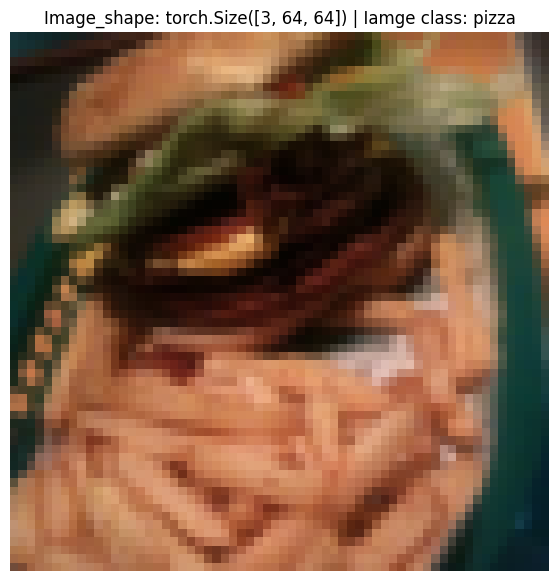

In [16]:
plt.figure(figsize =(10,7))

# Permute the dimensions of the tensor from (C, H, W) to (H, W, C) for imshow

plt.imshow(image.permute(1, 2, 0).numpy())
plt.title(f"Image_shape: {image.shape} | Iamge class: {img_class}")
plt.axis(False)

##Loading Image Data using image folder

In [17]:
train_dir , test_dir

(PosixPath('data/pizza_stack_shushi/train'),
 PosixPath('data/pizza_stack_shushi/test'))

In [18]:
from torchvision.datasets import ImageFolder
train_data = ImageFolder( root = train_dir , transform = data_transform , target_transform = None)
test_data  =  ImageFolder( root = test_dir , transform = data_transform , target_transform = None )

In [19]:
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [20]:
class_names_dict = train_data.class_to_idx
class_names_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
len(train_data), len(test_data)

(225, 75)

In [22]:
train_data.samples[200]

('data/pizza_stack_shushi/train/sushi/3353428.jpg', 2)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

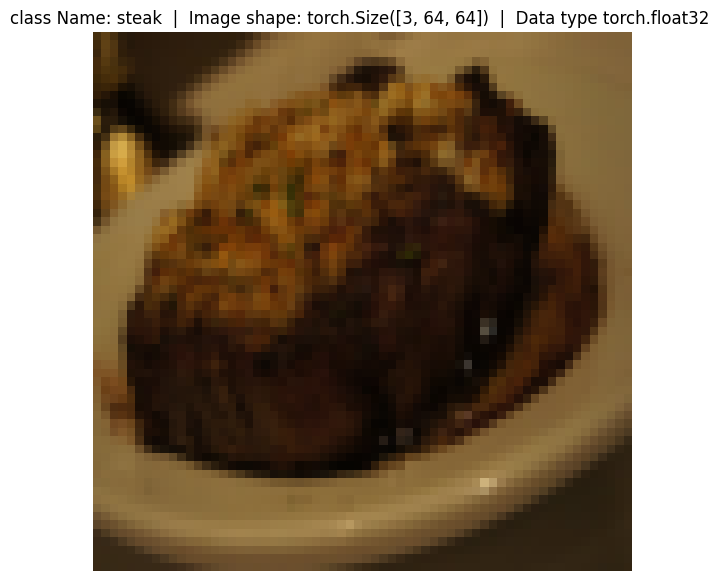

In [23]:
import random
#random.seed(42)
random_train_img = random.choice(train_data)
# ImageFolder return a tuple which 1st element is the image tensor and second element is the class name
image_tensor = random_train_img[0]
class_name = random_train_img[1]

plt.figure(figsize = (10,7))
plt.imshow(image_tensor.permute(1,2,0).numpy())
plt.title(f"class Name: {class_names[class_name]}  |  Image shape: {image_tensor.shape}  |  Data type { image_tensor.dtype} ")
plt.axis(False)

## Creating a train and test DataLoader

In [24]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32
train_dataloader = DataLoader( dataset = train_data , batch_size = BATCH_SIZE , shuffle = True)
test_dataloader = DataLoader ( dataset = test_data , batch_size = BATCH_SIZE , shuffle = False )


train_dataloader , test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7a63a3a55160>,
 <torch.utils.data.dataloader.DataLoader at 0x7a63a37bf2c0>)

In [25]:
print(f"Train dataloader length is {len(train_dataloader)} with each batch size  {BATCH_SIZE}")
print(f"Test dataloader lenght is {len(test_dataloader)} with each bactch size  {BATCH_SIZE}" )

Train dataloader length is 8 with each batch size  32
Test dataloader lenght is 3 with each bactch size  32


In [26]:
(225 /32) ,(75/32)

(7.03125, 2.34375)

In [27]:
train_feature_batch , train_label_batch = next(iter(train_dataloader))
test_feature_batch , test_label_batch = next(iter(test_dataloader))

In [28]:
train_feature_batch.shape , train_label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [29]:
train_feature_batch[31], train_label_batch[31]

(tensor([[[2.8127e-02, 3.9217e-02, 4.4164e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [2.9245e-02, 4.1489e-02, 4.5821e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.2390e-02, 5.4659e-02, 1.3407e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [6.6031e-01, 6.6117e-01, 6.6807e-01,  ..., 1.4567e-02,
           5.6955e-03, 3.8591e-03],
          [5.8236e-01, 6.7237e-01, 6.7813e-01,  ..., 1.3539e-02,
           5.3902e-03, 4.4211e-03],
          [2.9332e-01, 6.1950e-01, 6.7821e-01,  ..., 9.5946e-03,
           4.7780e-03, 4.7225e-03]],
 
         [[2.8339e-02, 2.9902e-02, 3.0189e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [2.8285e-02, 3.2326e-02, 3.4142e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.6801e-02, 4.8119e-02, 1.0783e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [5.9748e-01, 6.0278e-01, 6.0179e-01,  ..., 2.026

In [30]:
len(train_feature_batch) , len(test_feature_batch)

(32, 32)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

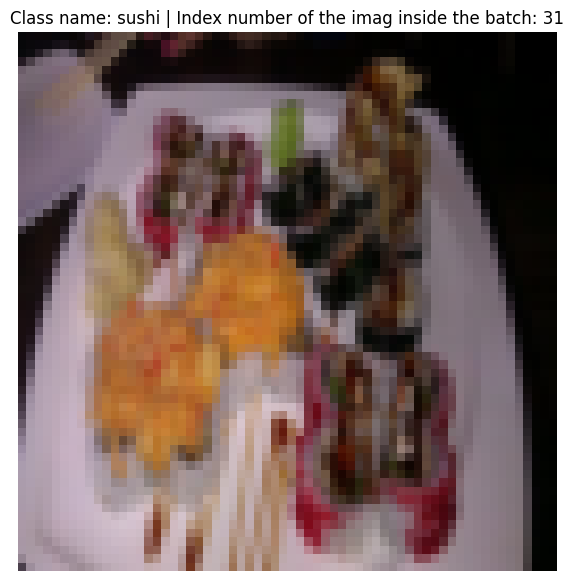

In [31]:
import random
import torch

random_idx = torch.randint( 0 , len(train_feature_batch), size = [1]).item()
img , label = train_feature_batch[random_idx] , train_label_batch[random_idx]


plt.figure(figsize =(10,7))
plt.imshow(img.permute(1,2,0).numpy())
plt.title(f"Class name: {class_names[label]} | Index number of the imag inside the batch: {random_idx}")
plt.axis(False)

##Loading a data from the folder without using pytorch ImageFolder module .
we will build our custom Data loader

In [32]:
import os
import pathlib
import torch

from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from typing import Dict , List , Tuple



#1. Creating a helper function to  get the class name and class name as dict from the data dirtectory

In [33]:
def get_class_names( directory: str)-> Tuple [List[str], Dict[str , int]]:

  classes = sorted(entry.name for entry in os.scandir(directory)if entry.is_dir())

  class_dict ={}
  for i , class_name in enumerate(classes):
    class_dict[class_name] =i

  return classes , class_dict


In [34]:
get_class_names(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

##Creating a coustom data set to replicate Dataset Module

In [34]:
from  torch.utils.data import Dataset


class ImageFolderCustom(Dataset):

  def __init__(self , targ_dir: str , transform = None):

    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))

    self.transform = transform

    self.classes , self.class_idx = get_class_names(targ_dir)

  def load_image(self  , index: int)->Image.Image:

    image_path = self.paths[index]

    return Image.open(image_path)

  # Over writing the __len__() function  it is the len of the sample
  def __len__(self):


    return len(self.paths)

  ## Overwriting __getitem__() method to return a particular sample
  def __getitem__(self , index:int )->Tuple[torch.Tensor , int]:









(tensor([[[0.3105, 0.3138, 0.3144,  ..., 0.1538, 0.1893, 0.1946],
          [0.3206, 0.3164, 0.3279,  ..., 0.1663, 0.2064, 0.2042],
          [0.3355, 0.3310, 0.3446,  ..., 0.1778, 0.2238, 0.2202],
          ...,
          [0.4867, 0.4191, 0.2977,  ..., 0.2368, 0.1960, 0.2074],
          [0.5009, 0.4321, 0.3041,  ..., 0.2286, 0.1900, 0.1909],
          [0.5222, 0.4320, 0.3105,  ..., 0.2318, 0.1871, 0.1715]],
 
         [[0.2828, 0.3003, 0.3055,  ..., 0.1090, 0.1088, 0.1103],
          [0.2929, 0.3028, 0.3184,  ..., 0.1115, 0.1203, 0.1147],
          [0.3086, 0.3174, 0.3336,  ..., 0.1120, 0.1314, 0.1246],
          ...,
          [0.4449, 0.4126, 0.3258,  ..., 0.2170, 0.1738, 0.1961],
          [0.4494, 0.4143, 0.3319,  ..., 0.2132, 0.1736, 0.1850],
          [0.4735, 0.4136, 0.3365,  ..., 0.2103, 0.1751, 0.1720]],
 
         [[0.2384, 0.2503, 0.2481,  ..., 0.0625, 0.0497, 0.0598],
          [0.2485, 0.2533, 0.2651,  ..., 0.0618, 0.0582, 0.0595],
          [0.2644, 0.2685, 0.2851,  ...,